# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_name = []
city_lat = []
city_lng= []
city_max_temp =[]
city_humidity = []
city_clouds = []
city_wind =[]
city_country =[]
city_date =[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
   # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = requests.get(query_url).json()
         city_weather = requests.get(city_url).json()

        
       # weather_json = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_name.append(city_weather['name'])
         city_lat.append(city_weather['coord']['lat'])
         city_lng.append(city_weather['coord']['lon'])
         city_max_temp.append(1.8*(city_weather['main']['temp_max']-273)+32)
              

         city_humidity.append(city_weather['main']['humidity'])
         city_clouds.append(city_weather['clouds']['all'])
         city_wind.append(city_weather['wind']['speed'] )
         city_country.append(city_weather['sys']['country'])
         city_date.append(city_weather['dt'])

        # Append the City information into city_data list
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | yamada
Processing Record 6 of Set 1 | arenapolis
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | novodvinsk
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | el granada
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | santa ines
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | opuwo
Processing Record 16 of Set 1 | zaozersk
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | batticaloa
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | roxas
Processing Re

Processing Record 39 of Set 4 | margaret river
Processing Record 40 of Set 4 | kodinar
Processing Record 41 of Set 4 | keflavik
Processing Record 42 of Set 4 | bageshwar
Processing Record 43 of Set 4 | constantia
Processing Record 44 of Set 4 | whakatane
Processing Record 45 of Set 4 | trevelin
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | kodok
City not found. Skipping...
Processing Record 48 of Set 4 | nizhneudinsk
Processing Record 49 of Set 4 | aykhal
Processing Record 0 of Set 5 | remire-montjoly
Processing Record 1 of Set 5 | sao vicente
Processing Record 2 of Set 5 | ta`u
Processing Record 3 of Set 5 | tazovsky
Processing Record 4 of Set 5 | bayanhongor
Processing Record 5 of Set 5 | mabaruma
Processing Record 6 of Set 5 | uyuni
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | happy valley-goose bay
Processing Record 10 of Set 5 | mil'kovo
Processing Record 11 of Set 5 | kurashiki
Processing R

Processing Record 33 of Set 8 | urumqi
Processing Record 34 of Set 8 | conduaga
Processing Record 35 of Set 8 | kushiro
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | cherykaw
Processing Record 38 of Set 8 | st. john's
Processing Record 39 of Set 8 | vila do maio
Processing Record 40 of Set 8 | nizhnyaya poyma
Processing Record 41 of Set 8 | suhut
Processing Record 42 of Set 8 | laurel
Processing Record 43 of Set 8 | yulin
Processing Record 44 of Set 8 | saladas
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | forster
Processing Record 47 of Set 8 | sterling
Processing Record 48 of Set 8 | tukrah
Processing Record 49 of Set 8 | kapoeta
Processing Record 0 of Set 9 | toga village
City not found. Skipping...
Processing Record 1 of Set 9 | argo
Processing Record 2 of Set 9 | sinan
Processing Record 3 of Set 9 | hinna
Processing Record 4 of Set 9 | assare
Processing Record 5 of Set 9 | alghero
Processing Record 6 of Set 9 | haimen
Processi

Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | choibalsan
Processing Record 24 of Set 12 | calera
Processing Record 25 of Set 12 | erenhot
Processing Record 26 of Set 12 | hassi messaoud
Processing Record 27 of Set 12 | guerrero negro
Processing Record 28 of Set 12 | champasak
Processing Record 29 of Set 12 | kandalaksha
Processing Record 30 of Set 12 | khalkhal
Processing Record 31 of Set 12 | avare
Processing Record 32 of Set 12 | kulia village
City not found. Skipping...
Processing Record 33 of Set 12 | santa rosa del sara
City not found. Skipping...
Processing Record 34 of Set 12 | woodlake
Processing Record 35 of Set 12 | hadibu
Processing Record 36 of Set 12 | amarante do maranhao
Processing Record 37 of Set 12 | balykshi
Processing Record 38 of Set 12 | bodaybo
Processing Record 39 of Set 12 | summerside
Processing Record 40 of Set 12 | norfolk
Processing Record 41 of Set 12 | safaga
Processing Record 42 of Set 12 | kharovsk
Processing Record 43 of Set 

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,56.642,85,7,2.44,ZA,1682635894
1,Alice Springs,-23.7000,133.8833,66.020,59,75,4.44,AU,1682635907
2,Puerto Ayora,-0.7393,-90.3518,88.034,88,65,2.24,EC,1682635861
3,Adamstown,-25.0660,-130.1015,75.236,65,89,2.22,PN,1682636002
4,Yamada,39.4667,141.9500,57.452,44,44,3.39,JP,1682636002


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bredasdorp,-34.5322,20.0403,56.642,85,7,2.44,ZA,1682635894
1,Alice Springs,-23.7000,133.8833,66.020,59,75,4.44,AU,1682635907
2,Puerto Ayora,-0.7393,-90.3518,88.034,88,65,2.24,EC,1682635861
3,Adamstown,-25.0660,-130.1015,75.236,65,89,2.22,PN,1682636002
4,Yamada,39.4667,141.9500,57.452,44,44,3.39,JP,1682636002


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

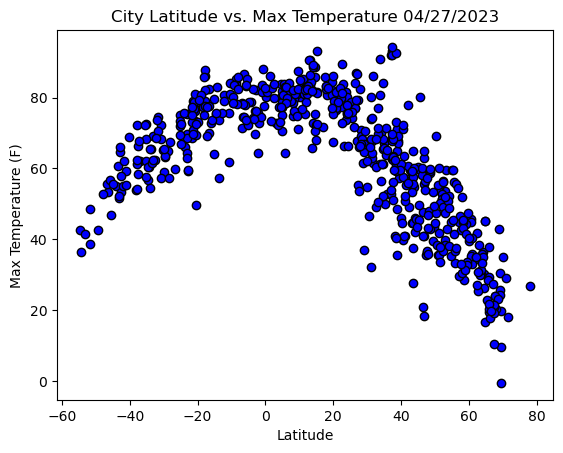

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker = "o", color = "blue",edgecolor = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')


# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

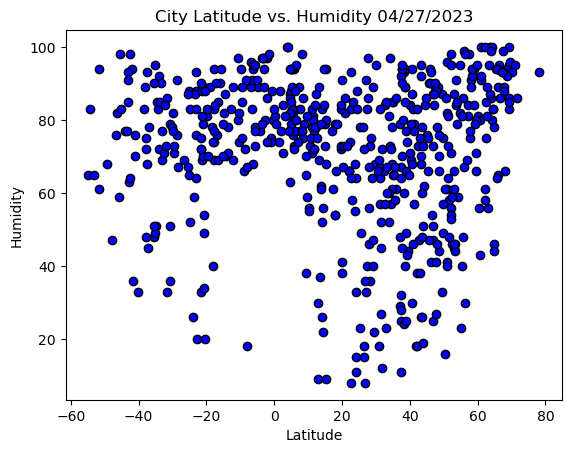

In [43]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker = "o", color = "blue",edgecolor = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')


# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

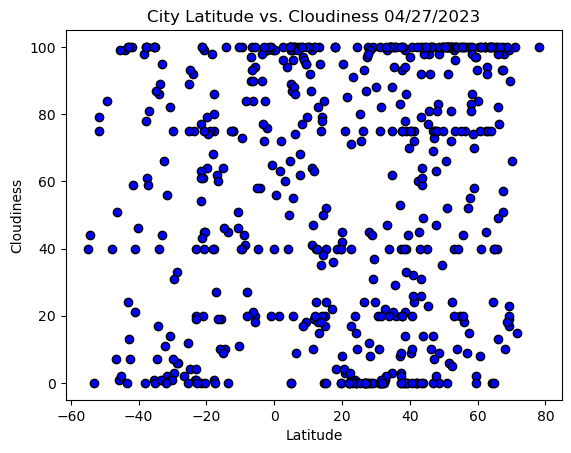

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker = "o", color = "blue",edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')


# Save the figure
plt.savefig("..\output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

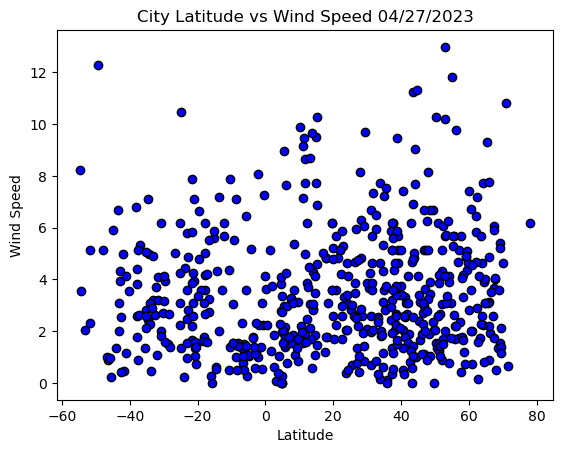

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker = "o", color = "blue",edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')


# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Yamada,39.4667,141.9500,57.452,44,44,3.39,JP,1682636002
7,Novodvinsk,64.4165,40.8122,30.218,83,100,3.91,RU,1682636003
8,Saint Paul Harbor,57.7900,-152.4072,42.584,75,100,5.66,US,1682636003
10,El Granada,37.5027,-122.4694,93.182,67,40,5.14,US,1682636004
15,Zaozërsk,69.4005,32.4476,19.814,95,23,2.12,RU,1682636007


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bredasdorp,-34.5322,20.0403,56.642,85,7,2.44,ZA,1682635894
1,Alice Springs,-23.7000,133.8833,66.020,59,75,4.44,AU,1682635907
2,Puerto Ayora,-0.7393,-90.3518,88.034,88,65,2.24,EC,1682635861
3,Adamstown,-25.0660,-130.1015,75.236,65,89,2.22,PN,1682636002
5,Arenápolis,-14.4503,-56.8461,75.416,87,10,0.60,BR,1682635937


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.86


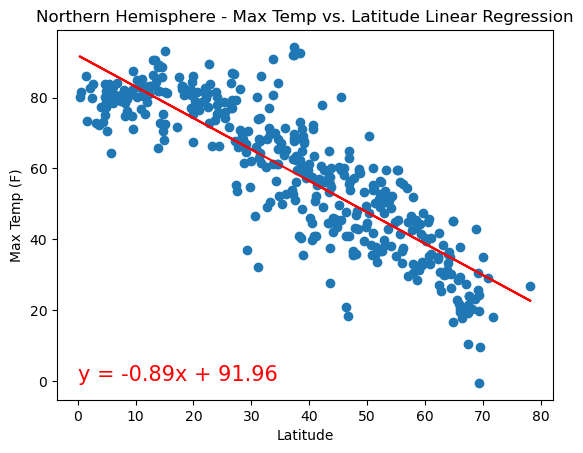

In [62]:
# Linear regression on Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.8


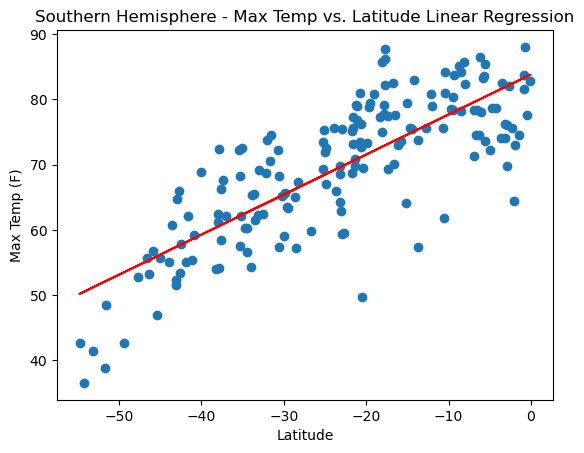

In [63]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, 0, 0)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:
In Northern hemisphere the regression shows negetive correlation
In Southern Hemispere the regression shows a positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.09


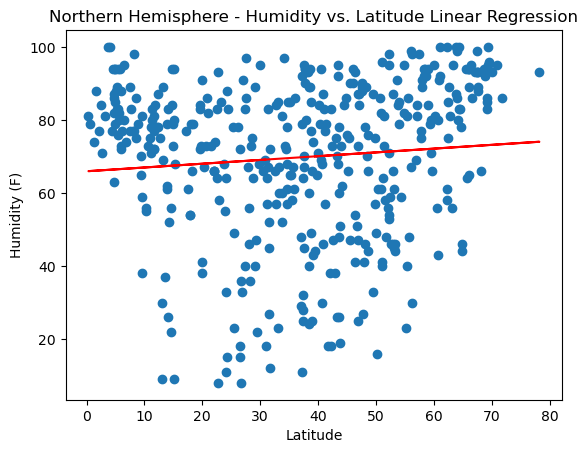

In [64]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (F)")

plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-squared is : 0.22


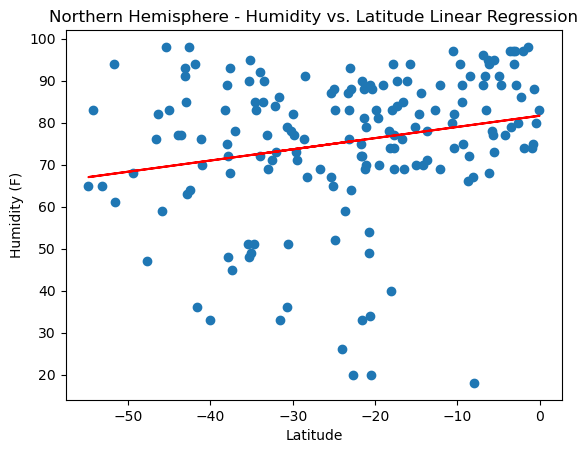

In [65]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (F)")

plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:In both Northern and southern hemisphere the humidity and latitude doesnot show much corelation

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.09


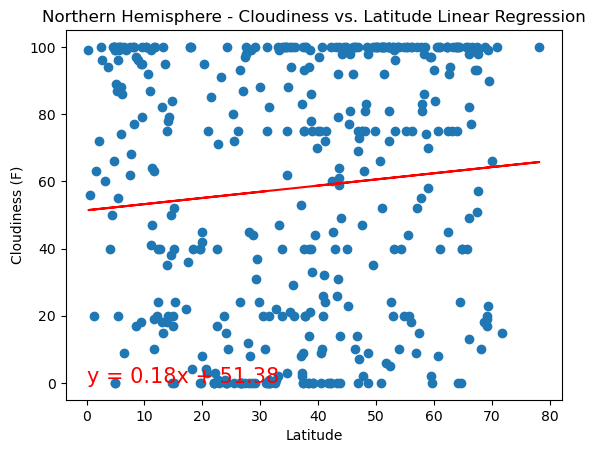

In [66]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (F)")

plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-squared is : 0.18


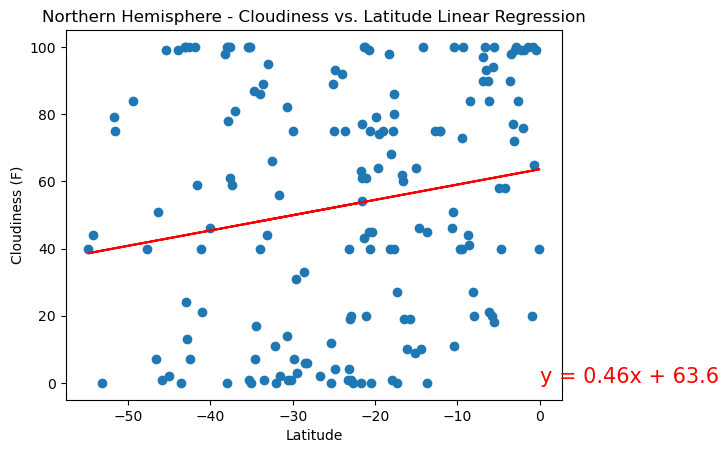

In [67]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (F)")

plt.savefig("../output_data/southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:In both Northern and southern hemisphere there is not much corelation between cloudiness and latitude 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.08


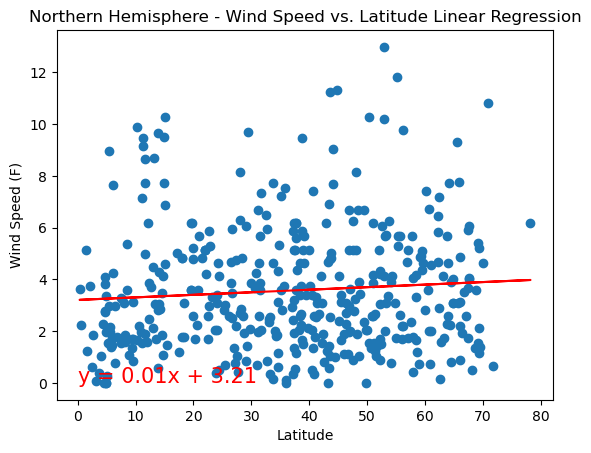

In [68]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (F)")

plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.15


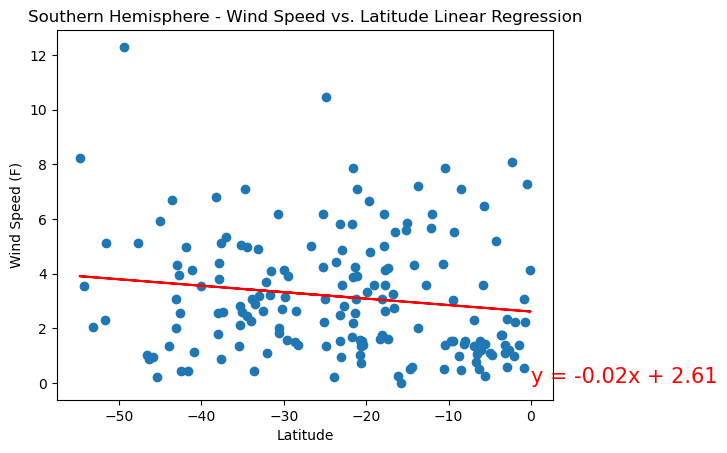

In [69]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (F)")

plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:In both Northern and southern hemisphere the wind speed and latitude doesnot show much corelation